# Decide on QC Metrics and Thresholds

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [4]:
df = pd.read_csv('../data/datasets_all_regions/origin_2010_2015_reloc_cog_ver3.csv',index_col=0)
df


,lat,lon,depth,time,orid,nass,p_picks,s_picks,rms
0,47.22533,-122.16895,56.111,1.262305e+09,0,7,2,5,1.081
7,48.19518,-121.77276,3.820,1.262305e+09,1,55,25,30,0.985
62,47.86208,-122.09903,17.799,1.262330e+09,2,28,10,18,0.784
90,47.96435,-122.91906,21.286,1.262336e+09,3,20,10,10,0.465
110,45.87262,-122.19180,9.822,1.262362e+09,4,39,20,19,0.657
...,...,...,...,...,...,...,...,...,...
1004270,40.59439,-124.42438,19.741,1.435097e+09,63882,23,9,14,1.015
1004293,40.54636,-127.10076,26.165,1.435100e+09,63883,12,1,11,0.744
1004305,49.74167,-124.58578,5.274,1.435101e+09,63884,13,7,6,0.894
1004318,40.64363,-125.36531,1.891,1.435101e+09,63885,8,3,5,0.982


## Histogram of picks for all events

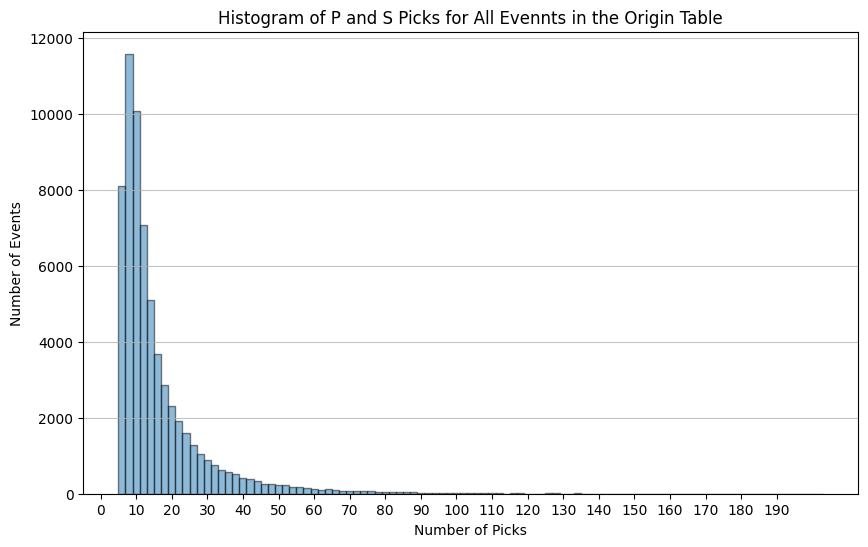

In [5]:
bins = np.linspace(df['nass'].min(), df['nass'].max(), 100)
plt.figure(figsize=(10, 6))
plt.hist(df['nass'],bins=bins, alpha=0.5, edgecolor='black')
plt.title('Histogram of P and S Picks for All Evennts in the Origin Table')
plt.xlabel('Number of Picks')
plt.ylabel('Number of Events')
plt.xticks(np.arange(0, 200, 10))
plt.grid(axis='y', alpha=0.75)

## Histogram of P picks for all events

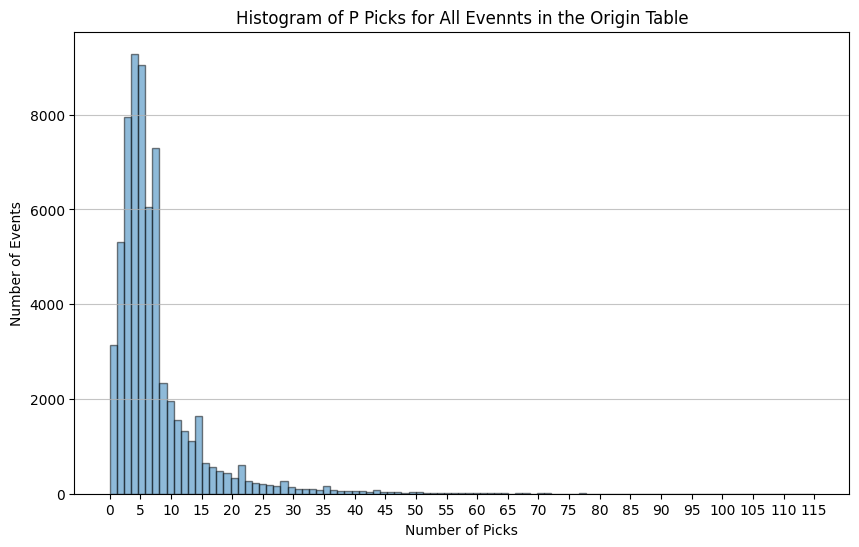

In [6]:
bins = np.linspace(df['p_picks'].min(), df['p_picks'].max(), 100)
plt.figure(figsize=(10, 6))
plt.hist(df['p_picks'],bins=bins, alpha=0.5, edgecolor='black')
plt.title('Histogram of P Picks for All Evennts in the Origin Table')
plt.xlabel('Number of Picks')
plt.ylabel('Number of Events')
plt.xticks(np.arange(0, 120, 5))

plt.grid(axis='y', alpha=0.75)

## Histogram of S picks for all events

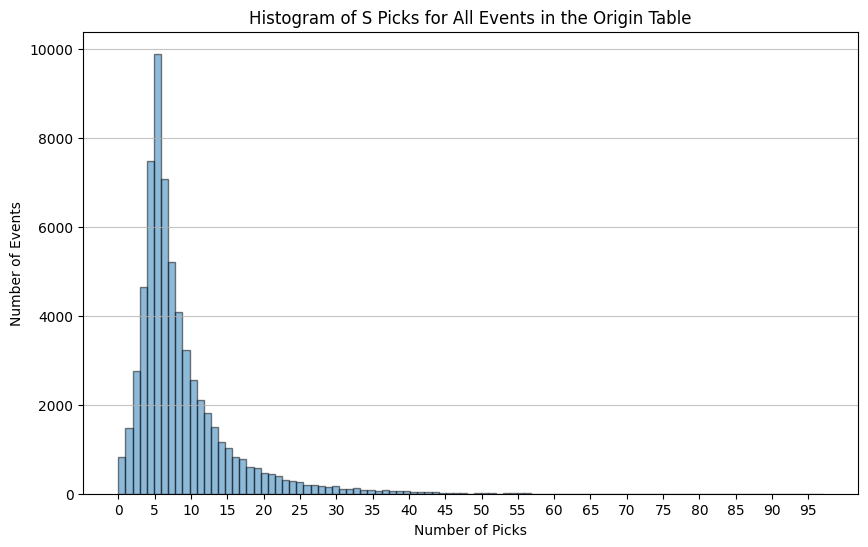

In [7]:
bins = np.linspace(df['s_picks'].min(), df['s_picks'].max(), 100)
plt.figure(figsize=(10, 6))
plt.hist(df['s_picks'],bins=bins, alpha=0.5, edgecolor='black')
plt.title('Histogram of S Picks for All Events in the Origin Table')
plt.xlabel('Number of Picks')
plt.ylabel('Number of Events')
plt.xticks(np.arange(0, 100, 5))
plt.grid(axis='y', alpha=0.75)

### Histograms of P and S picks combined

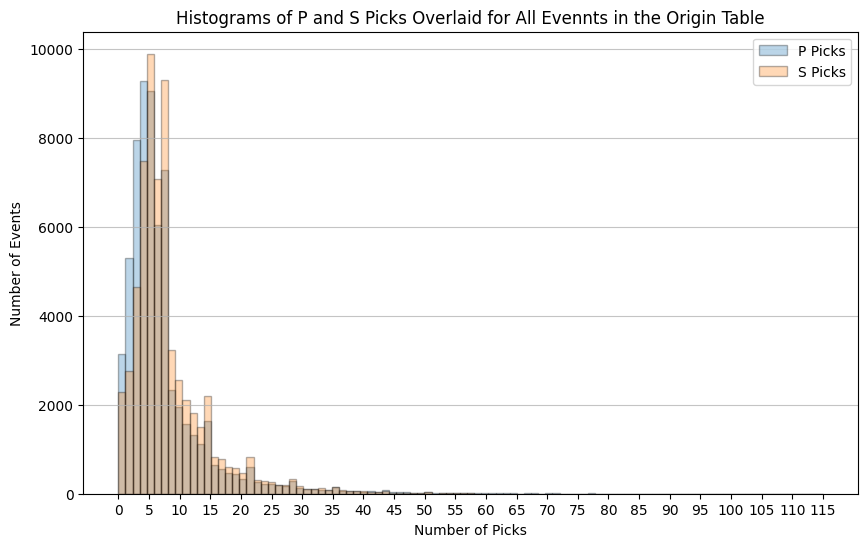

In [8]:
bins = np.linspace(df['p_picks'].min(), df['p_picks'].max(), 100)
plt.figure(figsize=(10, 6))
plt.hist(df['p_picks'],bins=bins, alpha=0.3, edgecolor='black', label='P Picks')
plt.hist(df['s_picks'], bins=bins, alpha=0.3, edgecolor='black', label='S Picks')

plt.title('Histograms of P and S Picks Overlaid for All Evennts in the Origin Table')
plt.xlabel('Number of Picks')
plt.ylabel('Number of Events')
plt.xticks(np.arange(0, 120, 5))
plt.legend()
plt.grid(axis='y', alpha=0.75)

## Histogram of RMS for all events

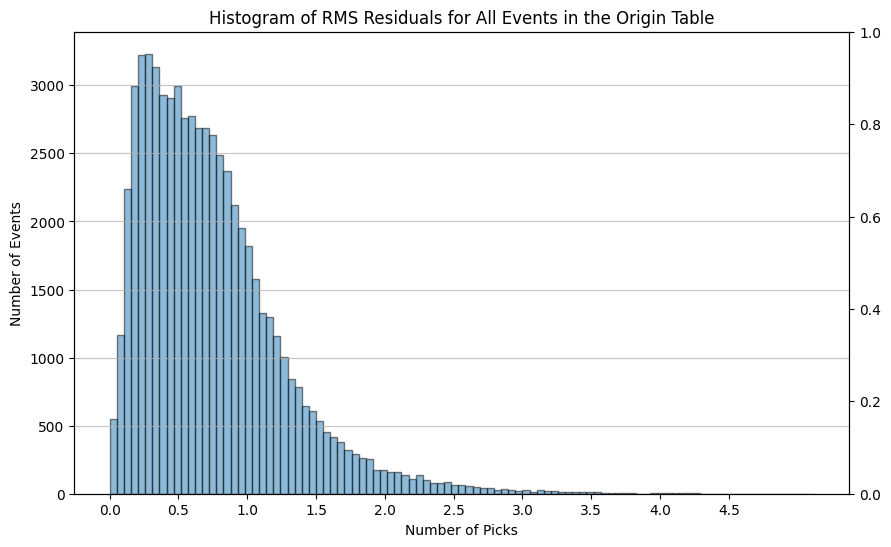

In [9]:
bins = np.linspace(df['rms'].min(), df['rms'].max(), 100)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax2 = ax.twinx()

ax.hist(df['rms'],bins=bins, alpha=0.5, edgecolor='black')
ax.set_title('Histogram of RMS Residuals for All Events in the Origin Table')
ax.set_xlabel('Number of Picks')
ax.set_ylabel('Number of Events')
ax.set_xticks(np.arange(0, 5, 0.5))
ax.grid(axis='y', alpha=0.75)

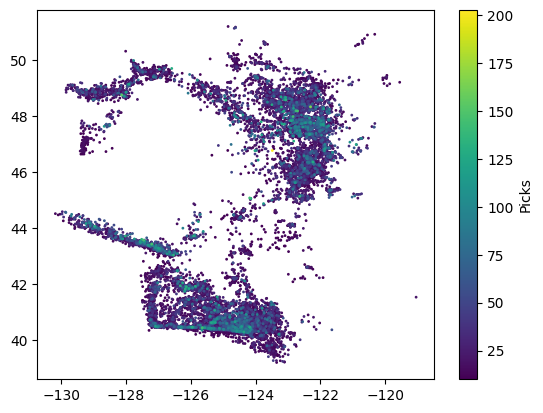

In [25]:
plt.figure()
_df = df[(df.rms<5)&(df.p_picks>4)&(df.s_picks>4)].sort_values('nass', ascending=True)
plt.scatter(_df['lon'], _df['lat'],c=_df['nass'], cmap='viridis',s=1)
plt.colorbar(label='Picks')